# Hyperparameter Tuning in Python (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Hyperparameter Tuning in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Hyperparameters and Parameters
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# CHAPTER 2 - Grid Search
from sklearn import metrics
import os

# CHAPTER 3 - Random Search
from itertools import product
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# CHAPTER 4 - Informed Search
from hyperopt import hp
from hyperopt import fmin, tpe
from sklearn.model_selection import cross_val_score
from tpot import TPOTClassifier


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Hyperparameters and Parameters

In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices.

#### Exercício 1 - Introduction & 'Parameters'

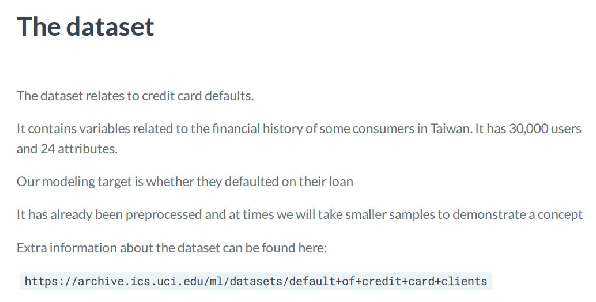

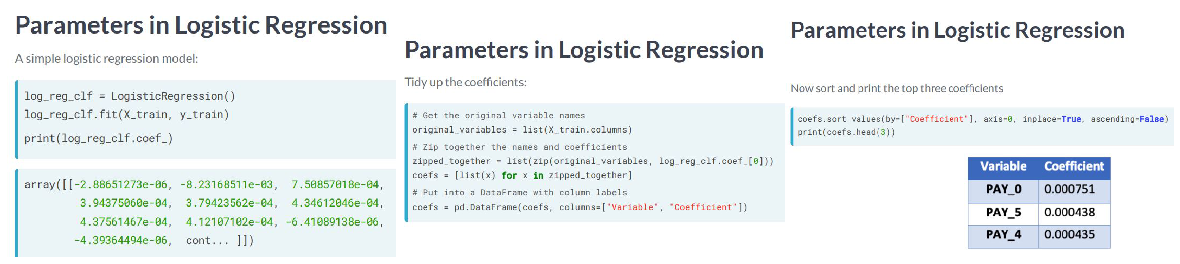

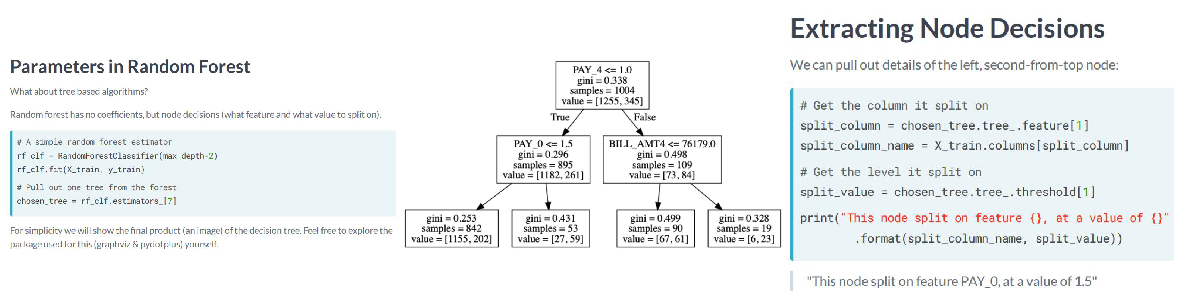

In [5]:
#vídeo
plot_1('dataset', right=1.6); print("="*120)
plot_3('log_reg', 'log_reg2', 'log_reg3'); print("="*120)
plot_3('rf', 'rf2', 'rf3')

Exercício 2

In [6]:
# Parameters in Logistic Regression

# Now that you have had a chance to explore what a parameter is, let us apply this knowledge. It is important to be able
# to review any new algorithm and identify which elements are parameters and hyperparameters.

# Which of the following is a parameter for the Scikit Learn logistic regression model?

# Possible Answers
# 1. n_jobs
# 2. coef_
# 3. class_weight
# 4. LogisticRegression()

print("2. coef_ (Coefficient of the features in the decision function.)")

2. coef_ (Coefficient of the features in the decision function.)


Exercício 3

In [7]:
# Extracting a Logistic Regression parameter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

credit = pd.read_csv(data_folder + "credit-card-full.csv")
X = credit.drop(['default payment next month', 'ID'], axis=1)
y = credit['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log_reg_clf = LogisticRegression(max_iter=1000)
log_reg_clf.fit(X_train, y_train)

credit.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [8]:
# Extracting a Logistic Regression parameter

# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df, "\n")

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
print(top_three_df)


     Variable  Coefficient
0   LIMIT_BAL    -0.000003
1         SEX    -0.000930
2   EDUCATION    -0.001163
3    MARRIAGE    -0.000989
4         AGE    -0.016596
5       PAY_0     0.001213
6       PAY_2     0.000964
7       PAY_3     0.000825
8       PAY_4     0.000779
9       PAY_5     0.000729
10      PAY_6     0.000681
11  BILL_AMT1    -0.000008
12  BILL_AMT2     0.000005
13  BILL_AMT3     0.000001
14  BILL_AMT4     0.000002
15  BILL_AMT5     0.000003
16  BILL_AMT6     0.000002
17   PAY_AMT1    -0.000030
18   PAY_AMT2    -0.000017
19   PAY_AMT3    -0.000010
20   PAY_AMT4    -0.000009
21   PAY_AMT5    -0.000007
22   PAY_AMT6    -0.000001 

  Variable  Coefficient
5    PAY_0     0.001213
6    PAY_2     0.000964
7    PAY_3     0.000825


Exercício 4

In [9]:
# Extracting a Random Forest parameter

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image ---> ver a seguir
#imgplot = plt.imshow(tree_viz)
#plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))


This node split on feature PAY_0, at a value of 1.5


In [10]:
%%script false

# PRODUZ OUTPUT, MAS A IMAGEM É MT EXTENSA PELO QUE NÃO SE VISUALIZA BEM. EXPERIMENTAR COM OUTROS CASOS

import pydotplus
from IPython.display import Image  
from sklearn import tree

# Create DOT data
dot_data = tree.export_graphviz(chosen_tree, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['0', '1'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Couldn't find program: 'false'


#### Exercício 5 - Introducing Hyperparameters

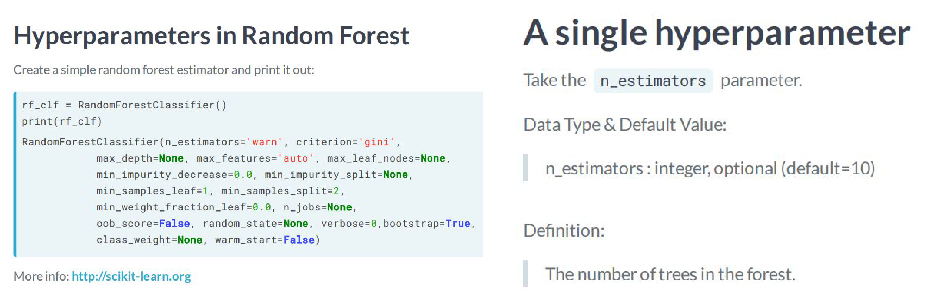

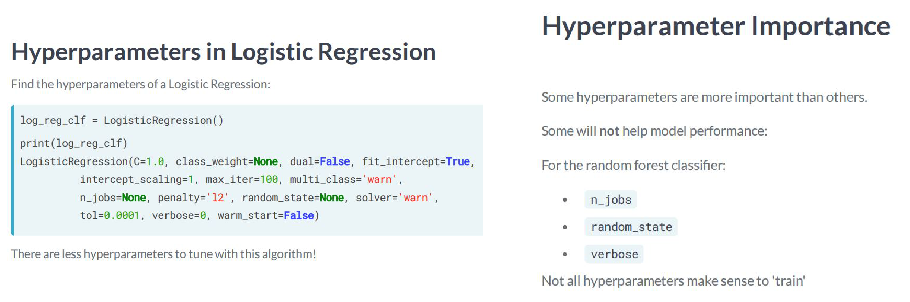

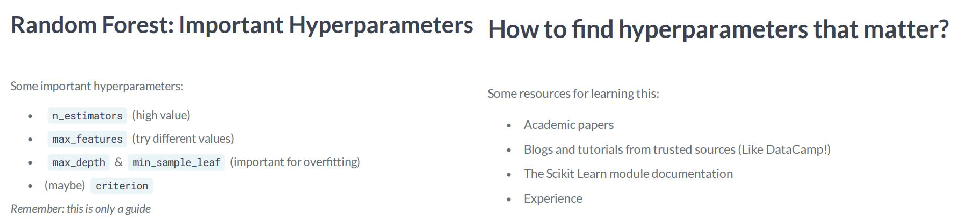

In [11]:
#vídeo

plot_2('rf_hyper', 'rf_single_hyper'); print("="*120)
plot_2('hyper_logreg', 'hyper_importance'); print("="*120)
plot_2('rf_important', 'hyperparameters_that_matter')

Exercício 6

In [12]:
# Hyperparameters in Random Forests

# Which of the following is a hyperparameter for the Scikit Learn random forest model?

# 1. oob_score
# 2. classes_
# 3. trees
# 4. random_level
print("1. oob_score")
rf_clf

1. oob_score


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Exercício 7

In [13]:
# Exploring Random Forest Hyperparameters

rf_clf_old = RandomForestClassifier(n_estimators=5, random_state=42)
rf_clf_old.fit(X_train, y_train)
rf_old_predictions = rf_clf_old.predict(X_test)
##############################################################################################

from sklearn.metrics import confusion_matrix, accuracy_score

# Print out the old estimator, notice which hyperparameter is badly set
print("Old estimator:\n", rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n {} \n\n Accuracy Score: {}\n".format(confusion_matrix(y_test, rf_old_predictions),
                                                                    accuracy_score(y_test, rf_old_predictions))) 

print("="*120)

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("New Confusion Matrix: \n", confusion_matrix(y_test, rf_new_predictions))
print("\nNew Accuracy Score: \n", accuracy_score(y_test, rf_new_predictions))

Old estimator:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Confusion Matrix: 
 [[4241  422]
 [ 865  472]] 

 Accuracy Score: 0.7855

New Confusion Matrix: 
 [[4414  249]
 [ 863  474]]

New Accuracy Score: 
 0.8146666666666667


Exercício 8

In [14]:
# Hyperparameters of KNN

from sklearn.neighbors import KNeighborsClassifier

# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)

print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))


The accuracy of 5, 10, 20 neighbours was 0.7585, 0.7741666666666667, 0.7788333333333334


#### Exercício 9 - Setting & Analyzing Hyperparameter values

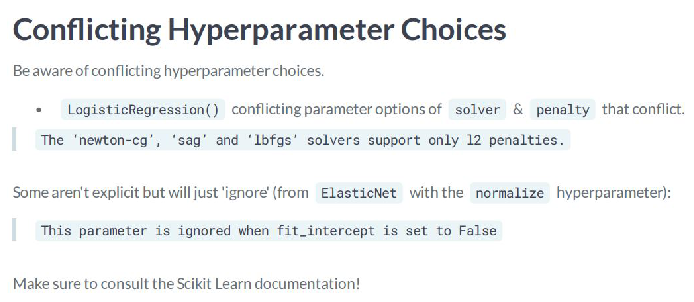

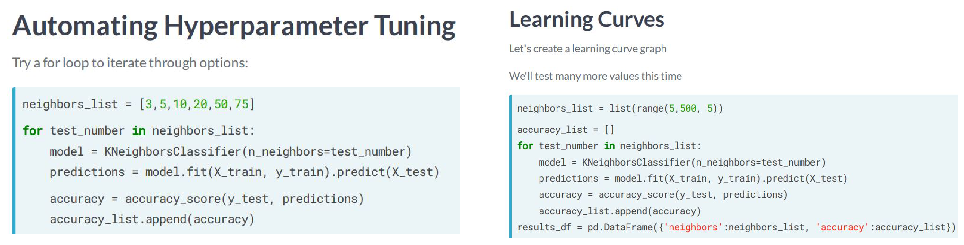

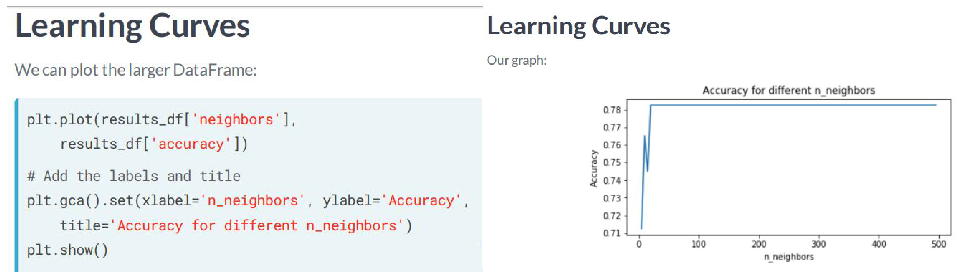

[1.   1.25 1.5  1.75 2.  ]


In [15]:
#vídeo   

plot_1('confl_hyp', right=1.6); print("="*120)
plot_2('automating_hyp', 'learning_curves', wspace=0.1); plot_2('lc_1','lc_2')

# A handy trick for generating values

# - Python's range function does not work for decimal steps.
# - A handy trick uses NumPy's np.linspace(start, end, num)

# Create a number of values ( num ) evenly spread within an interval ( start , end ) that you specify.
print(np.linspace(1,2,5))

Exercício 10

In [16]:
# Automating Hyperparameter Choice

from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for i in learning_rates:
    model = GradientBoostingClassifier(learning_rate=i)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([i, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
results_df

learning_rate  accuracy
0          0.001  0.777167
1          0.010  0.818833
2          0.050  0.819833
3          0.100  0.819833
4          0.200  0.817500
5          0.500  0.811167

Exercício 11

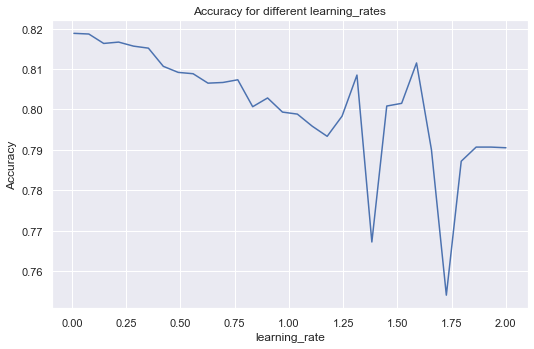

In [17]:
# Building Learning Curves

# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
    # Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# CHAPTER 2 - Grid Search

#### Exercício 1 - Introducing Grid Search

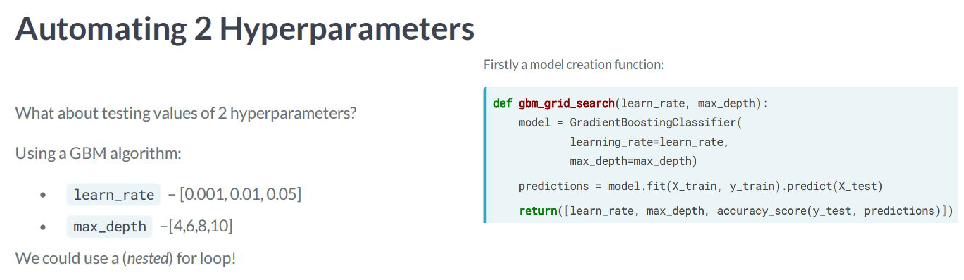

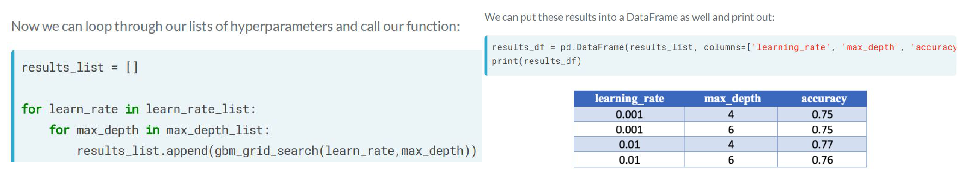

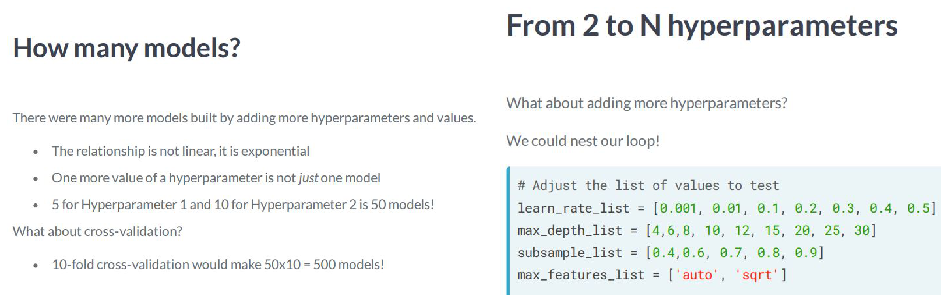

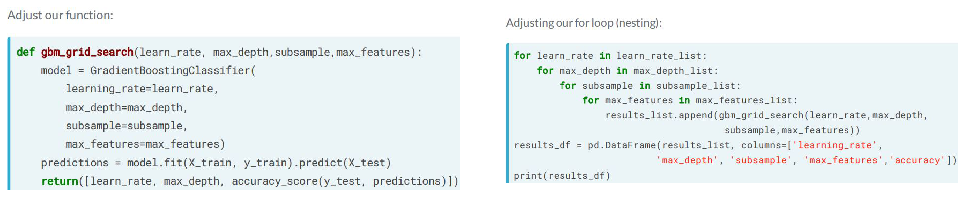

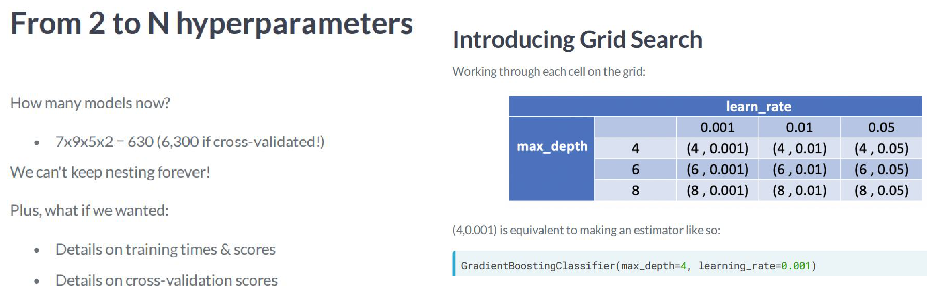

Grid Search Pros & Cons:

Some Advantages:
 - You don't have to write thousands oflines of code
 - Finds the best model within the grid (*special note here!)
 - Easy to explain
 
Some Disadvantages:
 - Computationally expensive! 
 - It is 'uninformed'. Results of one model don't help creating the next model.

--> We will cover 'informed' methods later


In [18]:
#vídeo

plot_2('automating_2_hyp', 'gbm_grid_search'); plot_2('loop_grid', 'results_grid'); print("="*120)
plot_2('how_many_models', '2_to_N'); plot_2('2_to_N_2', '2_to_N_3', wspace=0.1); print("="*120)
plot_2('2_N', 'gridsearch_intro')

print("""Grid Search Pros & Cons:

Some Advantages:
 - You don't have to write thousands oflines of code
 - Finds the best model within the grid (*special note here!)
 - Easy to explain
 
Some Disadvantages:
 - Computationally expensive! 
 - It is 'uninformed'. Results of one model don't help creating the next model.
\n--> We will cover 'informed' methods later""")

Exercício 2

In [19]:
# Build Grid Search functions

# Create the function
def gbm_grid_search(learn_rate, max_depth):
    # Create the model
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth)
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Return the hyperparameters and score
    return([learn_rate, max_depth, accuracy_score(y_test, predictions)])


Exercício 3

In [20]:
# Iteratively tune multiple hyperparameters

# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate,max_depth))

# Print the results
print(results_list)   

[[0.01, 2, 0.8185], [0.01, 4, 0.8176666666666667], [0.01, 6, 0.8133333333333334], [0.1, 2, 0.8196666666666667], [0.1, 4, 0.817], [0.1, 6, 0.8186666666666667], [0.5, 2, 0.8135], [0.5, 4, 0.8026666666666666], [0.5, 6, 0.7918333333333333]]


In [21]:
# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):
    # Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=subsample)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])   

results_list = []

# Create the new list to test
subsample_list = [0.4 , 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        # Extend the for loop
        for subsample in subsample_list:
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print results
print(results_list) 

[[0.01, 2, 0.4, 0.8185], [0.01, 2, 0.6, 0.8185], [0.01, 4, 0.4, 0.8158333333333333], [0.01, 4, 0.6, 0.8183333333333334], [0.01, 6, 0.4, 0.815], [0.01, 6, 0.6, 0.8126666666666666], [0.1, 2, 0.4, 0.8181666666666667], [0.1, 2, 0.6, 0.8188333333333333], [0.1, 4, 0.4, 0.8213333333333334], [0.1, 4, 0.6, 0.8186666666666667], [0.1, 6, 0.4, 0.8145], [0.1, 6, 0.6, 0.8165], [0.5, 2, 0.4, 0.8138333333333333], [0.5, 2, 0.6, 0.8115], [0.5, 4, 0.4, 0.7983333333333333], [0.5, 4, 0.6, 0.8035], [0.5, 6, 0.4, 0.785], [0.5, 6, 0.6, 0.7795]]


Exercício 4

In [22]:
# How Many Models?

# Adding more hyperparameters or values, you increase the amount of models created but the increases is not linear it is 
# proportional to how many values and hyperparameters you already have.

# How many models would be created when running a grid search over the following hyperparameters and values for a GBM 
# algorithm?

learning_rate = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2]
max_depth = [4,6,8,10,12,14,16,18, 20]
subsample = [0.4, 0.6, 0.7, 0.8, 0.9]
max_features = ['auto', 'sqrt', 'log2']

print("It would be created {} models".format(len(learning_rate)*len(max_depth)*len(subsample)*len(max_features)))


It would be created 1215 models


#### Exercício 5 - Grid Search with Scikit Learn

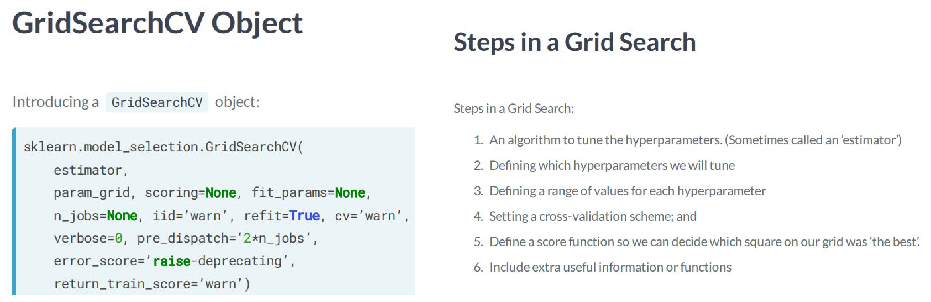

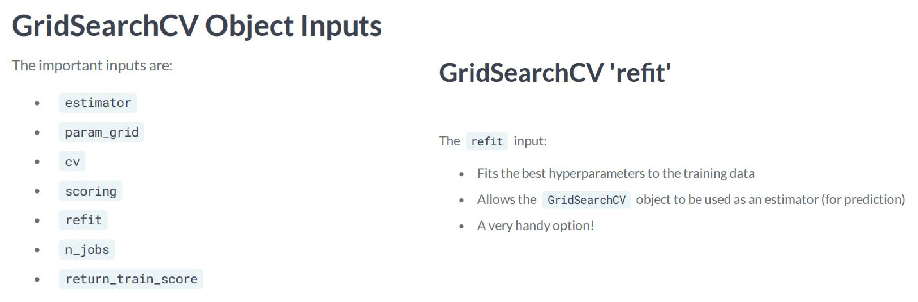

Scoring options: 
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


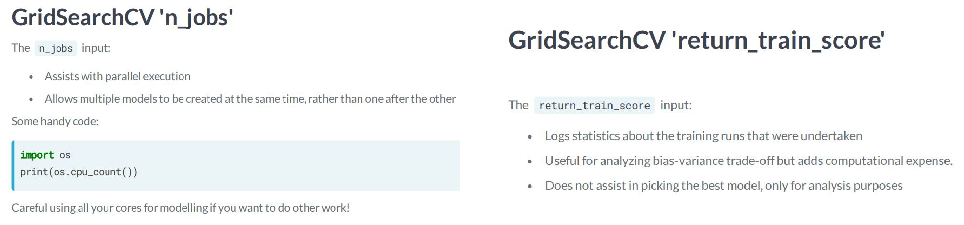

4


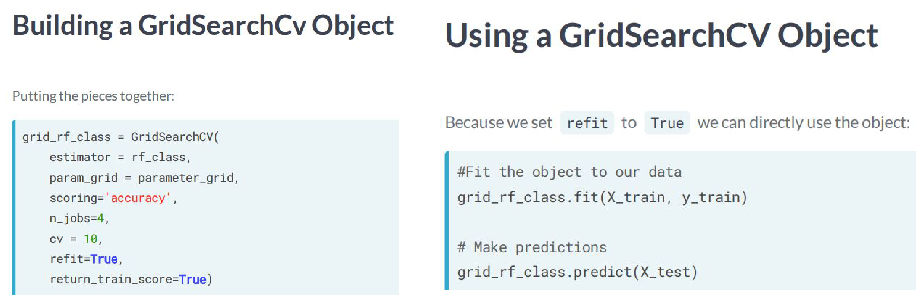

In [23]:
#vídeo

from sklearn.model_selection import GridSearchCV

plot_2('gridsearchcv', 'gridsearchcv_2'); print("="*120)
plot_2('grid_imp', 'gridsearc_refit')

from sklearn import metrics
print("Scoring options: \n{}".format(sorted(metrics.SCORERS.keys())))

plot_2('gridsearch_n_jobs', 'gridsearch_return_train_score', wspace=0.1)

import os
print(os.cpu_count())

print("="*120); plot_2('gridsearch_object', 'gridsearch_using')

Exercício 6

In [24]:
# GridSearchCV inputs

# model_3 = GridSearchCV(cv=7, error_score='raise-deprecating',
  #     estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
   #           learning_rate=0.1, loss='deviance', max_depth=3,
    #          max_features=None, max_leaf_nodes=None,
     #         min_impurity_decrease=0.0, min_impurity_split=None,
      #        min_samples_leaf=1, subsample=1.0, tol=0.0001, validation_fraction=0.1,
       #       verbose=0, warm_start=False), fit_params=None, iid='warn', n_jobs=2,
        #  --->    param_grid={'number_attempts': [2, 4, 6], 'max_depth': [3, 6, 9, 12]},
         #     pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
          #   scoring='accuracy', verbose=0)

print("model 3 will not work: 'number_attempts' is not a valid hyperparameter.")


model 3 will not work: 'number_attempts' is not a valid hyperparameter.


Exercício 7

In [25]:
# GridSearchCV with Scikit Learn

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']} 

# Create a GridSearchCV object (return_train_score=False by default, refit=True, n_jobs=None, cv=None)
grid_rf_class = GridSearchCV(estimator=rf_class, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=5,
                             refit=True, return_train_score=True)

grid_rf_class

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

#### Exercício 8 - Understanding a grid search output

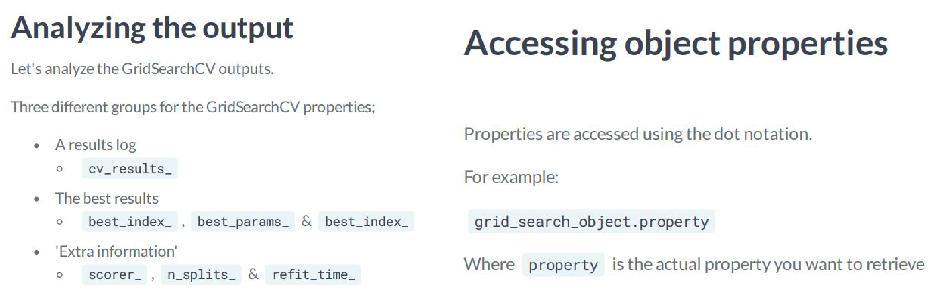

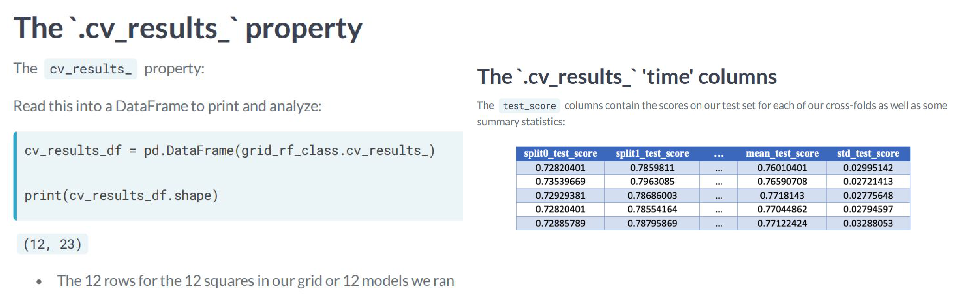

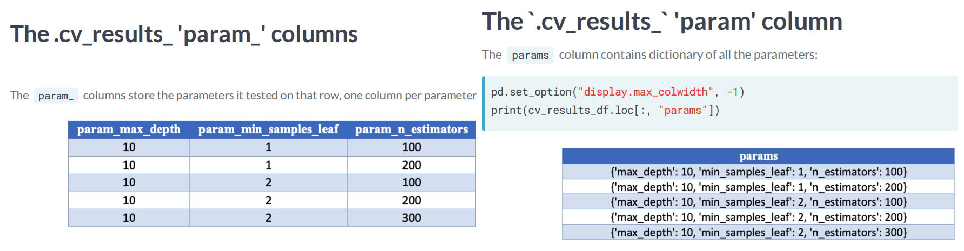

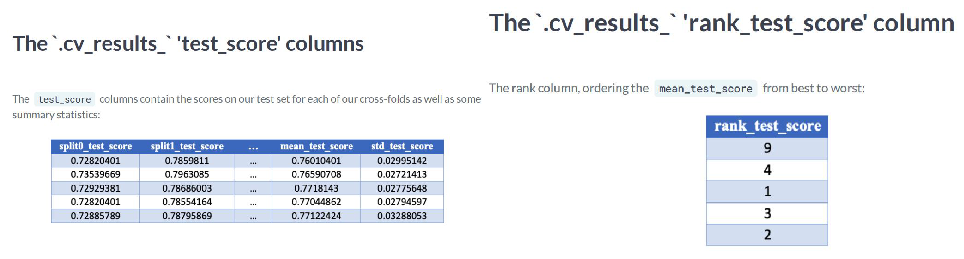

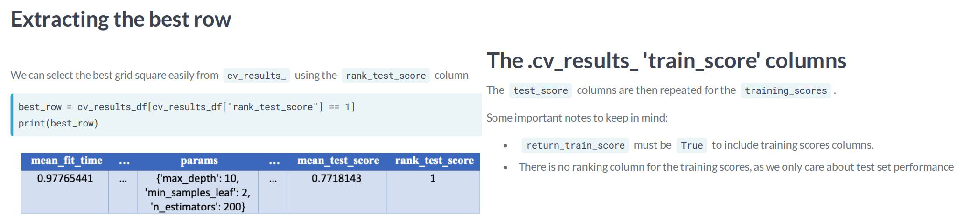

In [26]:
#vídeo

plot_2('analyzing_output', 'properties'); print("="*120)
plot_2('cv_results_', 'cv_results_time'); print("="*120)
plot_2('param_', 'cv_results_param'); print("="*120)
plot_2('test_score', 'rank_test_score'); print("="*120)
plot_2('best_row', 'train_score')

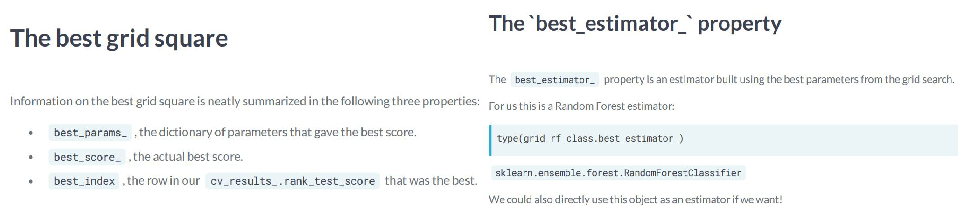

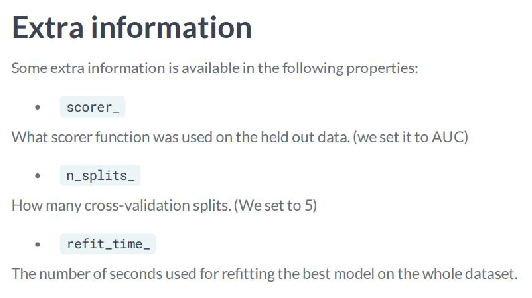

In [27]:
plot_2('best_grid', 'best_estimator')
plot_1('extra_information', right=1.2)

Exercício 9

In [28]:
# Using the best outputs

# Which of the following parameters must be set in order to be able to directly use the best_estimator_ property for
# predictions?

print("refit=True")

refit=True


Exercício 10

In [29]:
%%time
# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid (pus menos para simplificar)
param_grid = {'max_depth': [2, 4], 'max_features': ['auto', 'sqrt']} 

grid_rf_class = GridSearchCV(estimator=rf_class, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=3,
                             refit=True, return_train_score=True)

grid_rf_class.fit(X_train, y_train)

print(grid_rf_class)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

In [30]:
# Exploring the grid search results

# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.689648      0.042872         0.103947        0.004546   
1       1.745928      0.044783         0.119948        0.013104   
2       3.321738      0.054778         0.121919        0.002467   
3       3.205544      0.241385         0.112773        0.044287   

  param_max_depth param_max_features  \
0               2               auto   
1               2               sqrt   
2               4               auto   
3               4               sqrt   

                                     params  split0_test_score  \
0  {'max_depth': 2, 'max_features': 'auto'}           0.767849   
1  {'max_depth': 2, 'max_features': 'sqrt'}           0.769617   
2  {'max_depth': 4, 'max_features': 'auto'}           0.774177   
3  {'max_depth': 4, 'max_features': 'sqrt'}           0.774136   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.758885           0.766415         0.764383        0.003931   
1           0.762147           0.768230         0.766665        0.003245   
2           0.764995           0.776276         0.771816        0.004899   
3           0.765084           0.776031         0.771750        0.004777   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.770299            0.772053   
1                3            0.770198            0.773891   
2                1            0.779243            0.782871   
3                2            0.780262            0.783613   

   split2_train_score  mean_train_score  std_train_score  
0            0.764276          0.768876         0.003331  
1            0.765465          0.769851         0.003449  
2            0.775500          0.779205         0.003009  
3            0.775506          0.779793         0.003326

In [31]:

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
column

params
0  {'max_depth': 2, 'max_features': 'auto'}
1  {'max_depth': 2, 'max_features': 'sqrt'}
2  {'max_depth': 4, 'max_features': 'auto'}
3  {'max_depth': 4, 'max_features': 'sqrt'}

In [32]:
# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1 ]
best_row

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       3.321738      0.054778         0.121919        0.002467   

  param_max_depth param_max_features  \
2               4               auto   

                                     params  split0_test_score  \
2  {'max_depth': 4, 'max_features': 'auto'}           0.774177   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.764995           0.776276         0.771816        0.004899   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.779243            0.782871   

   split2_train_score  mean_train_score  std_train_score  
2              0.7755          0.779205         0.003009

Exercício 11

In [33]:
# Analyzing the best results

# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
best_score

0.7718157654078039

In [34]:
# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
best_row

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       3.321738      0.054778         0.121919        0.002467   

  param_max_depth param_max_features  \
2               4               auto   

                                     params  split0_test_score  \
2  {'max_depth': 4, 'max_features': 'auto'}           0.774177   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.764995           0.776276         0.771816        0.004899   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.779243            0.782871   

   split2_train_score  mean_train_score  std_train_score  
2              0.7755          0.779205         0.003009

In [35]:
# Get the max_depth parameter from the best-performing square
best_max_depth = grid_rf_class.best_params_["max_depth"]
best_max_depth

4

Exercício 12

In [36]:
# Using the best results

# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_), "\n")

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("\nConfusion Matrix \n", confusion_matrix(y_test, predictions))

from sklearn.metrics import roc_auc_score

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("\nROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))


<class 'sklearn.ensemble._forest.RandomForestClassifier'> 

[0 0 0 1 0]

Confusion Matrix 
 [[4507  156]
 [ 990  347]]

ROC-AUC Score 
 0.770978939377146


# CHAPTER 3 - Random Search

#### Exercício 1 - Introducing Random Search

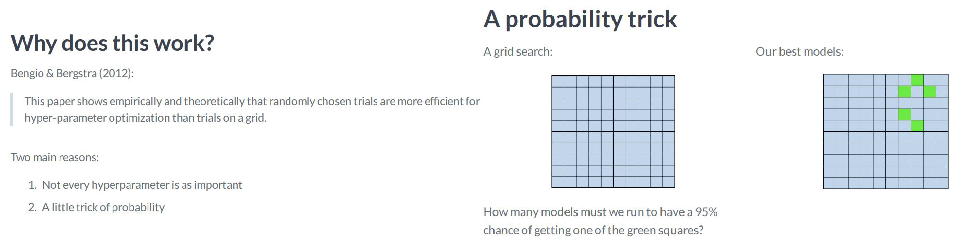

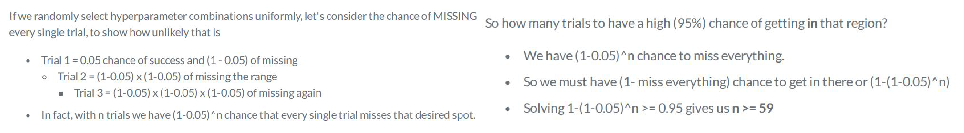

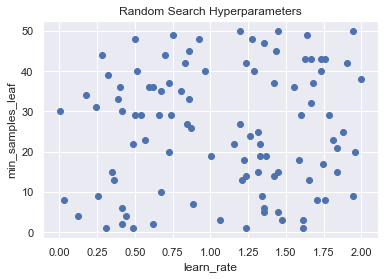

In [37]:
#vídeo

plot_2('why_randomsearch', 'probability_trick')
plot_2('prob_trick', '59_best'); print("="*120)

# Creating a random sample of hyperparameters

# Set some hyperparameter lists
learn_rate_list = np.linspace(0.001,2,150)
min_samples_leaf_list = list(range(1,51))

# Create list of combinations
from itertools import product

combinations_list = [list(x) for x in product(learn_rate_list, min_samples_leaf_list)]

# Select 100 models from our larger set
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 100, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

plt.scatter(x=[combinations_random_chosen[i][0] for i in range(len(combinations_random_chosen))],
            y=[combinations_random_chosen[i][1] for i in range(len(combinations_random_chosen))])
plt.title('Random Search Hyperparameters')
plt.xlabel('learn_rate')
plt.ylabel('min_samples_leaf')
plt.show()

Exercício 2

In [38]:
# Randomly Sample Hyperparameters

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

[[1.4401005025125628, 25], [0.6614070351758794, 26], [1.4475879396984925, 38], [0.5640703517587939, 13], [1.3203015075376885, 16], [0.9309547738693467, 26], [0.04743718592964824, 26], [1.1480904522613065, 35], [0.5865326633165829, 15], [0.691356783919598, 18], [1.4850251256281406, 31], [0.3918592964824121, 39], [1.3577386934673366, 34], [0.12979899497487438, 24], [0.6314572864321608, 34], [1.095678391959799, 29], [0.7812060301507537, 35], [1.0582412060301507, 14], [1.4026633165829145, 24], [1.1406030150753768, 34], [1.2978391959798994, 21], [0.10733668341708542, 23], [0.8336180904522613, 28], [0.40683417085427137, 17], [1.2529145728643216, 22], [0.3768844221105528, 10], [0.5266331658291458, 35], [1.4700502512562814, 22], [0.4442713567839196, 21], [0.10733668341708542, 15], [1.305326633165829, 36], [0.9758793969849247, 21], [1.3128140703517588, 19], [1.222964824120603, 19], [0.6988442211055276, 11], [0.3244723618090452, 30], [0.07738693467336683, 13], [0.691356783919598, 38], [0.9609045

Exercício 3

In [39]:
# Randomly Search with Random Forest

import random

# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ["auto", "sqrt", "log2"]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3, 56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

[['entropy', 'sqrt', 10], ['entropy', 'auto', 15], ['entropy', 'sqrt', 17], ['gini', 'auto', 8], ['entropy', 'log2', 3], ['entropy', 'log2', 34], ['entropy', 'log2', 5], ['entropy', 'sqrt', 54], ['gini', 'log2', 55], ['entropy', 'sqrt', 22], ['gini', 'sqrt', 39], ['gini', 'sqrt', 11], ['entropy', 'sqrt', 28], ['entropy', 'log2', 39], ['entropy', 'sqrt', 13], ['entropy', 'sqrt', 20], ['gini', 'auto', 34], ['entropy', 'auto', 5], ['gini', 'sqrt', 12], ['gini', 'auto', 21], ['entropy', 'auto', 36], ['gini', 'auto', 20], ['entropy', 'log2', 48], ['entropy', 'log2', 44], ['entropy', 'auto', 6], ['entropy', 'sqrt', 14], ['entropy', 'sqrt', 25], ['gini', 'log2', 53], ['gini', 'auto', 18], ['entropy', 'auto', 10], ['gini', 'sqrt', 34], ['entropy', 'log2', 6], ['gini', 'sqrt', 9], ['entropy', 'log2', 52], ['gini', 'log2', 25], ['gini', 'sqrt', 26], ['entropy', 'sqrt', 29], ['entropy', 'log2', 20], ['entropy', 'sqrt', 45], ['gini', 'auto', 48], ['gini', 'sqrt', 24], ['entropy', 'log2', 47], ['gi

Exercício 4

In [40]:
# Visualizing a Random Search

# sample_hyperparameters function
def sample_hyperparameters(n_samples):
    global combinations_random_chosen
    
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
        return
    
    combinations_random_chosen = []
    random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples)  # , replace=False
    combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    return

# visualize_search function
def visualize_search():
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]
    
    # Plot all together
    plt.clf() 
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    #plt.gca().set_xlim([0.01, 1.5])
    #plt.gca().set_ylim([10, 29])
    plt.show()
    
# Select lists
learn_rate_list
min_samples_leaf_list

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_leaf_list)]

10000


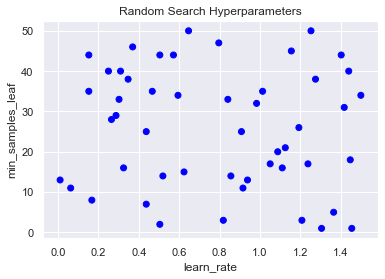

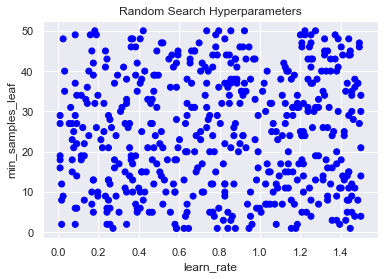

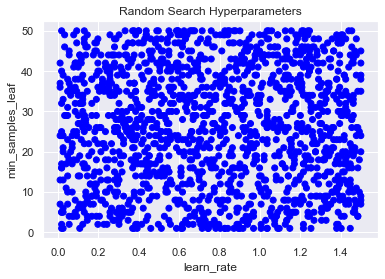

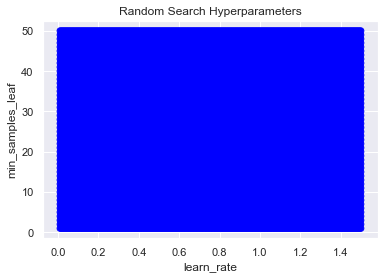

The bigger your sample space of a random search, the more it looks like a grid search.


In [41]:
# Confirm how hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise combinations
for x in [50, 500, 1500]:
    sample_hyperparameters(x)
    visualize_search()

# Sample all the hyperparameter combinations & visualise
sample_hyperparameters(number_combs)
visualize_search()

print("""The bigger your sample space of a random search, the more it looks like a grid search.""")

#### Exercício 5 - Random Search in Scikit Learn

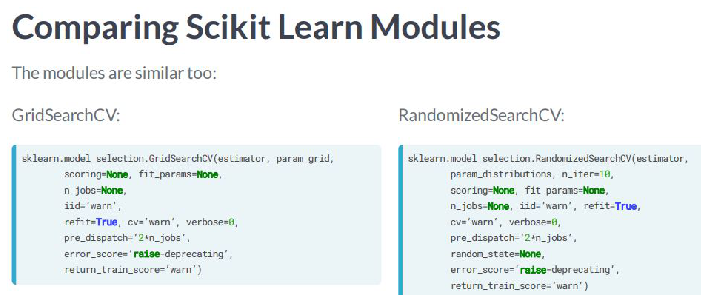

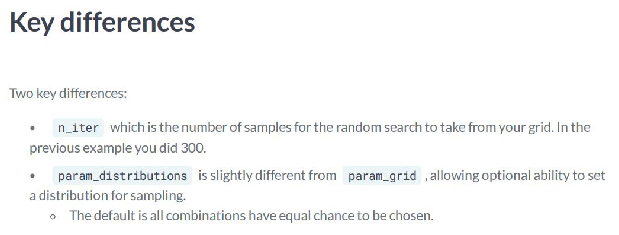

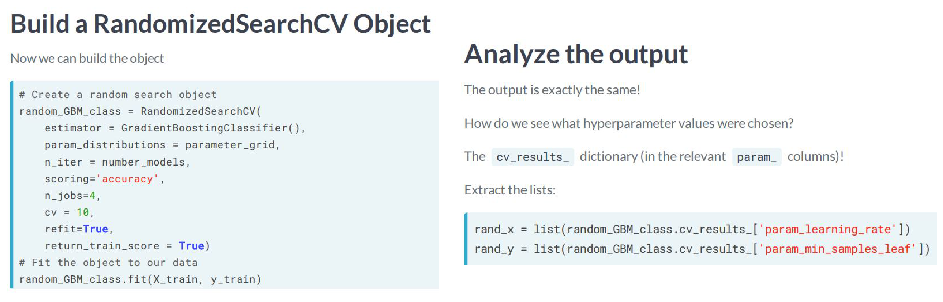

In [42]:
#vídeo

plot_1('comparing_grid_random', right=1.7); plot_1('key_differences', right=1.4)
plot_2('randomsearchcv_object', 'analyze_output_random')


Exercício 6

In [43]:
# RandomSearchCV inputs

# Let's test your knowledge of how RandomizedSearchCV differs from GridSearchCV.
# Which of these parameters is only for a RandomizedSearchCV?
print("n_iter")

n_iter


Exercício 7

In [44]:
# The RandomizedSearchCV Object

from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 100), 'min_samples_leaf': list(range(20, 65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                                      param_distributions = param_grid,
                                      n_iter = 10,
                                      scoring='accuracy', n_jobs=4, cv = 3, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])


[0.8484848484848484 0.6757575757575757 1.6737373737373737
 0.3494949494949495 0.42626262626262623 0.8292929292929292
 1.097979797979798 1.002020202020202 0.17676767676767677
 1.7121212121212122]
[64 61 42 24 64 58 21 57 24 33]


Exercício 8

In [45]:
# RandomSearchCV in Scikit Learn

# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators=80),
                                     param_distributions = param_grid, n_iter=5,
                                     scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])


[7 21 23 10 25]
['auto' 'auto' 'sqrt' 'sqrt' 'auto']


#### Exercício 9 - Comparing Grid and Random Search

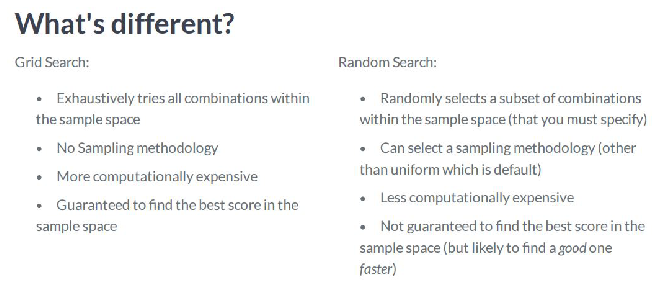

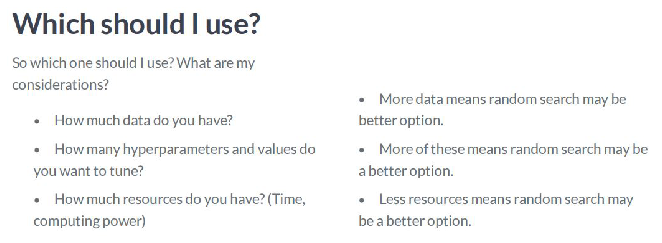

In [46]:
#vídeo

plot_1('differences_grid_random', right=1.5); plot_1('grid_or_random', right=1.5)

Exercício 10

In [47]:
# Comparing Random & Grid Search

# Which of the following is an advantage of random search?
print("""It is more computationally efficient than Grid Search.""")

It is more computationally efficient than Grid Search.


Exercício 11

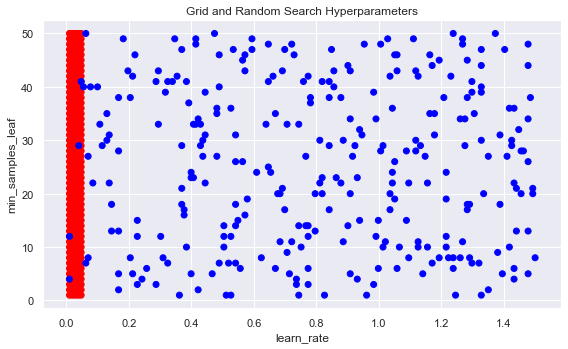

In [48]:
# Grid and Random Search Side by Side

# combinations_list which is a list of combinations of learn_rate and min_samples_leaf for this algorithm

def visualize_search(grid_combinations_chosen, random_combinations_chosen):
    grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
    rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

    # Plot all together
    plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
    #plt.gca().set_xlim(x_lims)
    #plt.gca().set_ylim(y_lims)
    
    plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
    plt.show()

############################################################################################
    
# Sample grid coordinates - 300
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)


# CHAPTER 4 - Informed Search

In this final chapter you will be given a taste of more advanced hyperparameter tuning methodologies known as ''informed search''. This includes a methodology known as Coarse To Fine as well as Bayesian & Genetic hyperparameter tuning algorithms. You will learn how informed search differs from uninformed search and gain practical skills with each of the mentioned methodologies, comparing and contrasting them as you go.

#### Exercício 1 - Informed Search: Coarse to Fine

Informed vs Uninformed Search:
So far everything we have done has been uninformed search:
 - Uninformed search: Where each iteration of hyperparameter tuning does not learn from the previous iterations.
 - This is what allows us to parallelize our work. Though this doesn't sound very efficient?


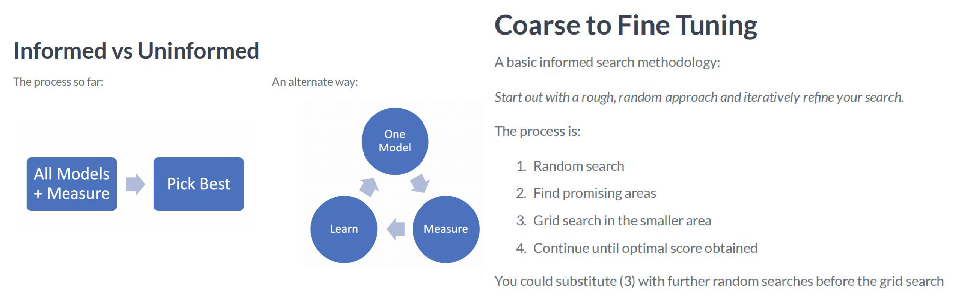

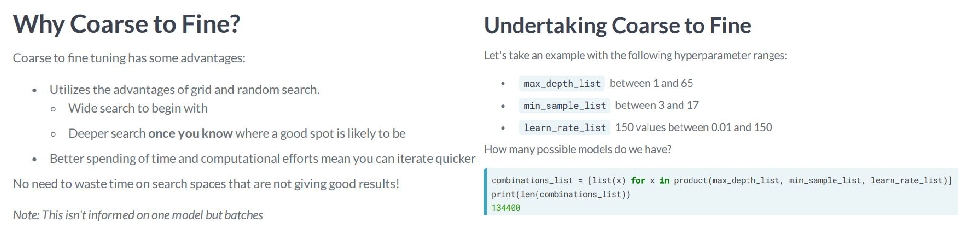

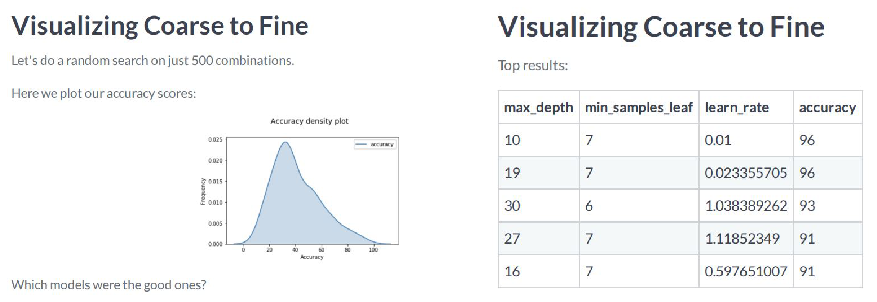

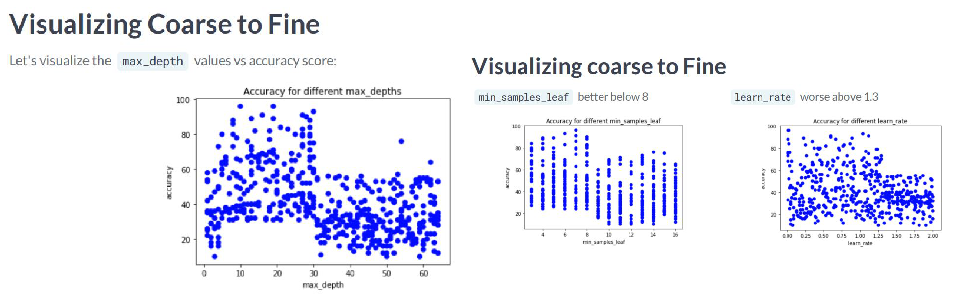

The next steps:
What we know from iteration one:
 - max_depth between 8 and 30
 - learn_rate less than 1.3
 - min_samples_leaf perhaps less than 8
Where to next? Another random or grid search with what we know!

Note: This was only bivariate analysis. You can explore looking at multiple hyperparameters (3, 4 or more) on a single
graph, but that's beyond the scope of this course.


In [49]:
#vídeo

print("""Informed vs Uninformed Search:
So far everything we have done has been uninformed search:
 - Uninformed search: Where each iteration of hyperparameter tuning does not learn from the previous iterations.
 - This is what allows us to parallelize our work. Though this doesn't sound very efficient?""")

plot_2('informed_uninformed', 'coarse_to_fine'); print("="*120); plot_2('why_coarse', 'undertaking_coarse_to_fine')

print("="*120); plot_2('visualizing_coarse_to_fine', 'visualizing_coarse_to_fine_2')
plot_2('visualizing_coarse_to_fine_max_depth', 'visualizing_coarse_to_fine_others')
print("""The next steps:
What we know from iteration one:
 - max_depth between 8 and 30
 - learn_rate less than 1.3
 - min_samples_leaf perhaps less than 8
Where to next? Another random or grid search with what we know!

Note: This was only bivariate analysis. You can explore looking at multiple hyperparameters (3, 4 or more) on a single
graph, but that's beyond the scope of this course.""")

Exercício 2

In [50]:
# Visualizing Coarse to Fine
def visualize_hyperparameter(name):
    plt.clf()
    plt.scatter(results_df[name], results_df['accuracy'], c=['blue']*100)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([np.min(results_df['accuracy']) - 0.005, np.max(results_df['accuracy']) + 0.005])
    plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
    plt.show()

In [51]:
# Combination list
combinations_list = [list(x) for x in product(max_depth_list, min_samples_leaf_list)]

# Create the parameter grid
param_grid = {'max_depth': max_depth_list, 'min_samples_leaf': min_samples_leaf_list} 

# Create a random search object
random_RF_class = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                      param_distributions = param_grid,
                                      n_iter = 100,
                                      scoring='accuracy', n_jobs=4, cv = 3, refit=True, return_train_score = True)

# Fit to the training data
random_RF_class.fit(X_train, y_train)

#####################################################

results_df = pd.DataFrame(random_RF_class.cv_results_, 
                          columns=['param_min_samples_leaf', 'param_max_depth', 'mean_test_score'])

results_df.rename(columns={'param_min_samples_leaf': 'min_samples_leaf', 
                           'param_max_depth': 'max_depth',
                           'mean_test_score': 'accuracy'}, inplace=True)
results_df.head()

min_samples_leaf max_depth  accuracy
0               33        21  0.820833
1               50        29  0.820042
2               38        55  0.821250
3               32        39  0.820917
4                1        42  0.816625

2650 

Top 10 results:
    min_samples_leaf max_depth  accuracy
99                5         8  0.822000
37               13        48  0.821958
29               25        14  0.821917
92               32        24  0.821917
32               28        16  0.821917
45               23        43  0.821833
44                7        43  0.821750
50               22        25  0.821750
42               29        37  0.821708
76               17        35  0.821708 

Index(['min_samples_leaf', 'max_depth', 'accuracy'], dtype='object')


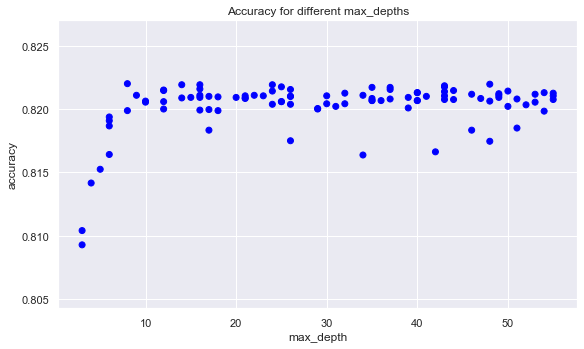

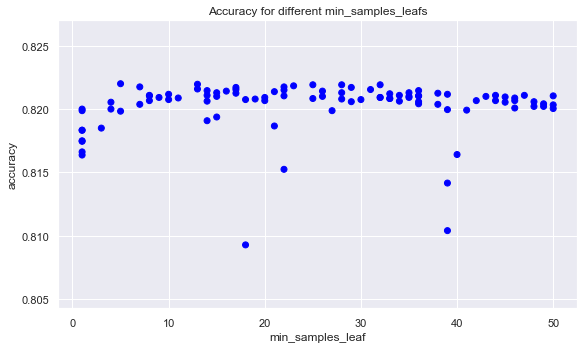

In [52]:
# Confirm the size of the combinations_list
print(len(combinations_list), "\n")

# Sort the results_df by accuracy and print the top 10 rows
print("Top 10 results:\n", results_df.sort_values(by='accuracy', ascending=False).head(10), "\n")

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')

Exercício 3

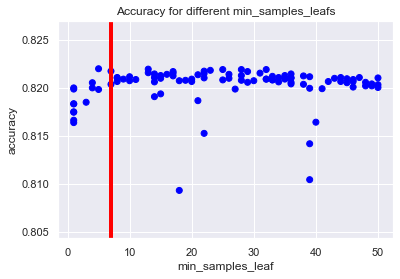

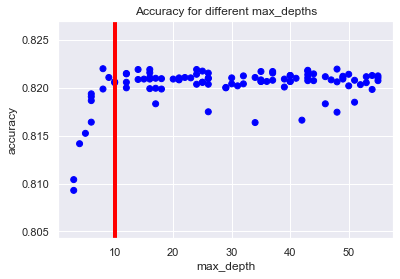

In [53]:
# Coarse to Fine Iterations

def visualize_first():  # com as linhas vermelhas convenientemente definidas
    for name in results_df.columns[0:2]:
        plt.clf()
        plt.scatter(results_df[name], results_df['accuracy'], c=['blue']*100)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0, 1])
        x_line = 7
        if name == "max_depth":
            x_line = 10
        plt.axvline(x=x_line, color="red", linewidth=4)
        plt.gca().set_ylim([np.min(results_df['accuracy']) - 0.005, np.max(results_df['accuracy']) + 0.005])
        plt.show()

##########################################

# Use the provided function to visualize the first results
visualize_first()

In [54]:
# Create some combinations lists & combine
max_depth_list
min_samples_leaf_list

# We ran the 1,000 model GridSearch in the background based on those new combinations. Now use the visualize_second() 
# function to visualize the second iteration (grid search) and see if there is any improved results.

def visualize_second():
    for name in results_df2.columns[0:2]:
        plt.clf()
        plt.scatter(results_df2[name], results_df2['accuracy'], c=['blue']*1000)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
        plt.show()

# Call the function to visualize the second results
print("""Demoraria muito tempo.
A ideia era ver se com o GridSearch haveria uma melhoria significativa nos resultados (results_df2).""")

Demoraria muito tempo.
A ideia era ver se com o GridSearch haveria uma melhoria significativa nos resultados (results_df2).


#### Exercício 4 - Informed Search: Bayesian Statistics

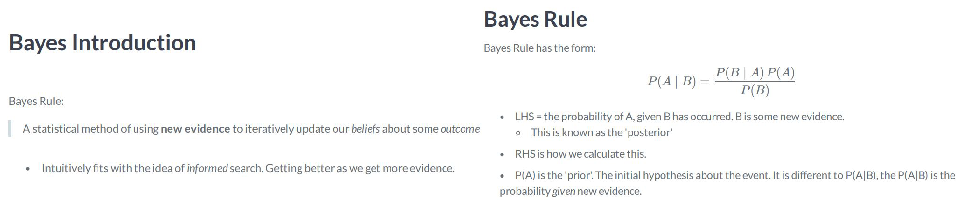

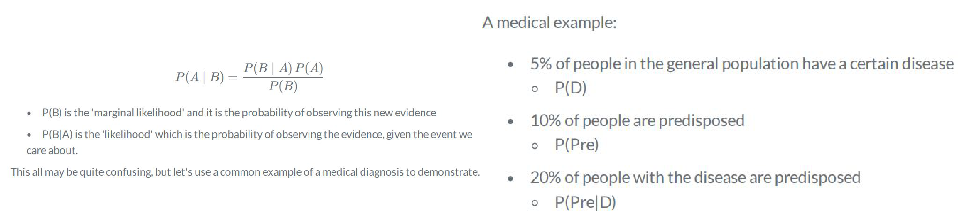

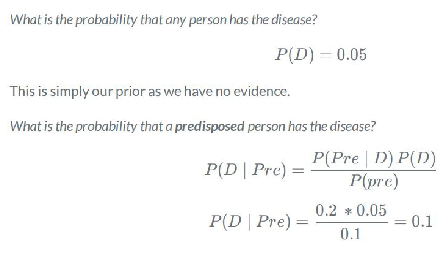

Bayes in Hyperparameter Tuning:

We can apply this logic to hyperparameter tuning:
 - Pick a hyperparameter combination
 - Build a model
 - Get new evidence (the score of the model)
 - Update our beliefs and chose better hyperparameters next round
Bayesian hyperparameter tuning is very new but quite popular for larger and more complex hyperparameter tuning tasks, as 
they work well to find optimal hyperparameter combinations in these situations.


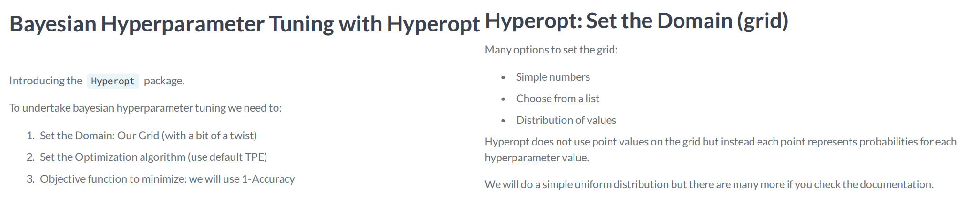

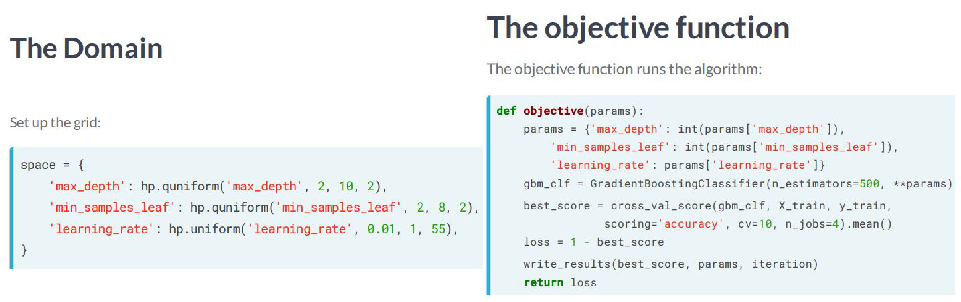

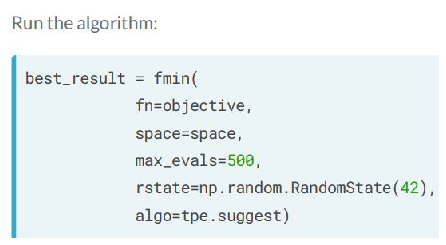

In [55]:
#vídeo

plot_2('bayes_intro', 'bayes_rule'); plot_2('bayes_rule_2', 'bayes_medicine')
plot_1('bayes_medicine_2')
print("""Bayes in Hyperparameter Tuning:\n
We can apply this logic to hyperparameter tuning:
 - Pick a hyperparameter combination
 - Build a model
 - Get new evidence (the score of the model)
 - Update our beliefs and chose better hyperparameters next round
Bayesian hyperparameter tuning is very new but quite popular for larger and more complex hyperparameter tuning tasks, as 
they work well to find optimal hyperparameter combinations in these situations.""")

plot_2('hyperopt', 'hyperopt_2'); plot_2('domain', 'objective_function'); plot_1('run_algorithm')

Exercício 5

In [56]:
# Bayes Rule in Python

# In this exercise you will undertake a practical example of setting up Bayes formula, obtaining new evidence and updating
# your 'beliefs' in order to get a more accurate result. The example will relate to the likelihood that someone will close 
# their account for your online software product.

# These are the probabilities we know:

# 7% (0.07) of people are likely to close their account next month
# 15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
# 35% (0.35) of people who are likely to close their account are unhappy with your product

# Assign the different probabilities (as decimals) to variables. 
# p_unhappy is the likelihood someone is unhappy, 
# p_unhappy_close is the probability that someone is unhappy with the product, given they are going to close their account.

# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# You interview one of your customers and discover they are unhappy. What is the probability they will close their account,
# now that you know this evidence? 

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

print("""There's a 16.3% chance that a customer, given that they are unhappy, will close their account. 
Next we'll use a package which uses this methodology to automatically tune hyperparameters for us.""")

0.16333333333333336
There's a 16.3% chance that a customer, given that they are unhappy, will close their account. 
Next we'll use a package which uses this methodology to automatically tune hyperparameters for us.


Exercício 6

In [57]:
# Bayesian Hyperparameter tuning with Hyperopt

from hyperopt import hp
from hyperopt import fmin, tpe
from sklearn.model_selection import cross_val_score

# Set up space dictionary with specified hyperparameters (max_depth using quniform distribution (between 2 and 10, 
# increasing by 2), and learning_rate using uniform distribution (0.001 to 0.9))

space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.RandomState(42), algo=tpe.suggest)
print(best)

100%|██████████| 20/20 [04:46<00:00, 12.41s/it, best loss: 0.18204166666666666]
{'learning_rate': 0.0128515490384306, 'max_depth': 6.0}


#### Exercício 7 - Informed Search: Genetic Algorithms

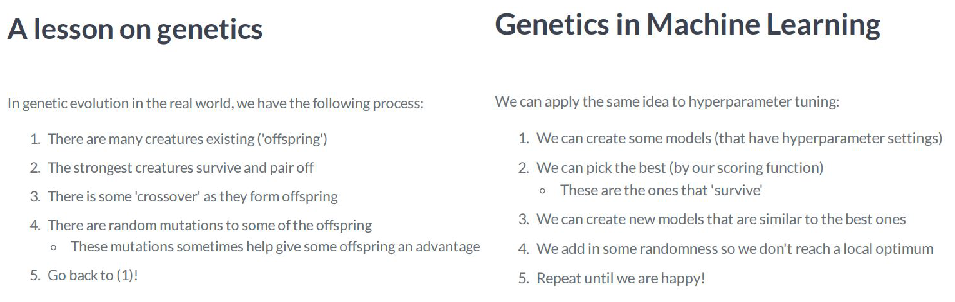

Why does this work well?
This is an informed search that has a number of advantages:
 - It allows us to learn from previous iterations, just like bayesian hyperparameter tuning.
 - It has the additional advantage of some randomness.
 - (The package we'll use) takes care of many tedious aspects of machine learning.



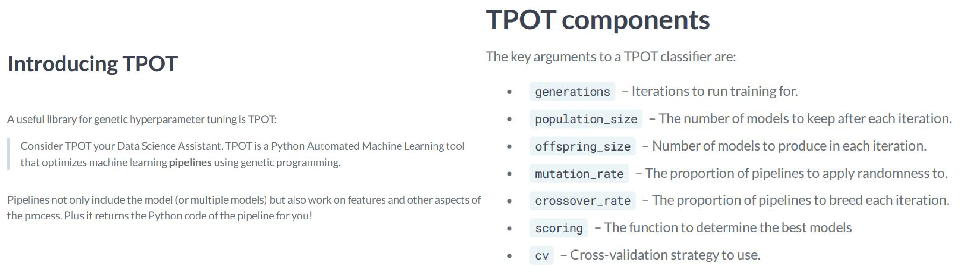

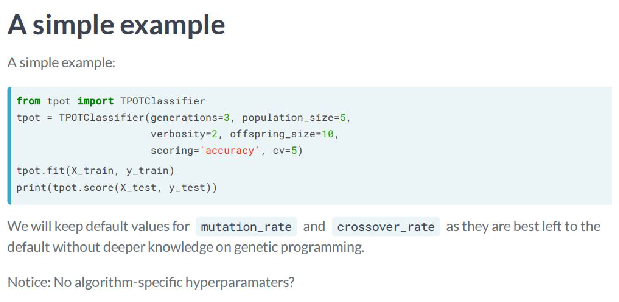

In [58]:
#vídeo

plot_2('genetic_1', 'genetics_2')
print("""Why does this work well?
This is an informed search that has a number of advantages:
 - It allows us to learn from previous iterations, just like bayesian hyperparameter tuning.
 - It has the additional advantage of some randomness.
 - (The package we'll use) takes care of many tedious aspects of machine learning.\n""")

plot_2('tpot', 'tpot_components'); from tpot import TPOTClassifier
plot_1('tpot_example', right=1.4)

Exercício 8

In [66]:
# Genetic Hyperparameter Tuning with TPOT

# This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. You would
# have a much larger population and offspring size as well as hundreds more generations to find a good model.

# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

print("""\nYou can see in the output the score produced by the chosen model (in this case a version of Naive Bayes) over 
each generation, and then the final accuracy score with the hyperparameters chosen for the final model. 
This is a great first example of using TPOT for automated hyperparameter tuning. """)


Generation 1 - Current best internal CV score: 0.81775
Generation 2 - Current best internal CV score: 0.81775
Generation 3 - Current best internal CV score: 0.8178749999999999

Best pipeline: XGBClassifier(StandardScaler(input_matrix), learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, nthread=1, subsample=0.2)
0.8205

You can see in the output the score produced by the chosen model (in this case a version of Naive Bayes) over 
each generation, and then the final accuracy score with the hyperparameters chosen for the final model. 
This is a great first example of using TPOT for automated hyperparameter tuning. 


Exercício 9

In [61]:
# Analysing TPOT's stability

# You will now see the random nature of TPOT by constructing the classifier with different random states and seeing what
# model is found to be best by the algorithm. This assists to see that TPOT is quite unstable when not run for a reasonable
# amount of time.

In [62]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.8206249999999999
Generation 2 - Current best internal CV score: 0.8206249999999999

Best pipeline: ExtraTreesClassifier(RobustScaler(input_matrix), bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=19, min_samples_split=5, n_estimators=100)
0.8193333333333334


In [63]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=122)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.8209583333333332
Generation 2 - Current best internal CV score: 0.8211666666666666

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.8)
0.8191666666666667


In [64]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=99)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.809125
Generation 2 - Current best internal CV score: 0.8192083333333333

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.25, min_samples_leaf=19, min_samples_split=10, n_estimators=100)
0.8185


In [65]:
print("""You can see that TPOT is quite unstable when only running with low generations, population size and offspring. 

The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest. Increasing the 
generations, population size and offspring and running this for a long time will assist to produce better models and more
stable results. Don't hesitate to try it yourself on your own machine!""")

You can see that TPOT is quite unstable when only running with low generations, population size and offspring. 

The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest. Increasing the 
generations, population size and offspring and running this for a long time will assist to produce better models and more
stable results. Don't hesitate to try it yourself on your own machine!


#### Exercício 10 - End

In [67]:
#vídeo

# Fim